In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import Hartmannb
from scipy import stats

The result of custom_function at [0.95, 0.95, 0.95, 0.95, 0.95, 0.95] is 0.00011397265188861638


In [3]:
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch

In [4]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import FeatureAgglomeration
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.cluster import FeatureAgglomeration

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
from botorch.acquisition import qLogExpectedImprovement
from botorch.acquisition import qLogNoisyExpectedImprovement
import random 
from botorch.models import SingleTaskGP
from botorch.models.transforms.input import Normalize
from botorch.models.transforms.outcome import Standardize
from gpytorch.mlls import ExactMarginalLogLikelihood
# from botorch.fit import fit_gpytorch_model 
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf
import os

In [9]:
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [10]:
# 读取 Excel 文件
df = pd.read_excel('钼铋分选.xlsx', sheet_name='Sheet1')  # 替换为你的文件名和工作表名

# 显示数据
print(df.head())

    粗精产率  粗精品味Mo  粗精品味Bi  粗精品味S  粗精回收率Mo  粗精回收率Bi  粗精回收率S  粗尾品味Mo  粗尾品味Bi  \
0  12.49   0.225   0.633   8.71    84.71    76.35   92.56  0.0058   0.028   
1  12.12   0.228   0.674   9.08    87.00    78.81   92.61  0.0047   0.025   
2  10.88   0.244   0.719  10.06    88.16    77.82   92.47  0.0040   0.025   
3   9.74   0.293   0.831  10.76    86.58    78.89   88.56  0.0049   0.024   
4   9.48   0.280   0.845  10.86    84.69    80.08   88.34  0.0053   0.022   

   粗尾品味S  ...   乙硫氮   丁黄药  BK205   水玻璃     ph  硝酸铅  矿浆浓度  CYB-05  CYB-06  \
0   0.10  ...  80.0  40.0   30.0     0  10.05  NaN    42     NaN     NaN   
1   0.10  ...  80.0  40.0   30.0   300  10.22  NaN    42     NaN     NaN   
2   0.10  ...  80.0  40.0   30.0   600  10.30  NaN    42     NaN     NaN   
3   0.15  ...  80.0  40.0   30.0   900  10.37  NaN    42     NaN     NaN   
4   0.15  ...  80.0  40.0   30.0  1200  10.43  NaN    42     NaN     NaN   

   CYQ-03  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows

In [11]:
# x = df[['碳酸钠', '乙硫氮', '丁黄药', 'BK205', '水玻璃',  '硝酸铅', '矿浆浓度', 'CYB-05', 'CYB-06', 'CYQ-03','给矿品味S','给矿品味Mo','给矿品味Bi']]


In [12]:
x = df[['碳酸钠', '乙硫氮', '丁黄药', 'BK205', '水玻璃',  '硝酸铅', '矿浆浓度', 'CYB-05', 'CYB-06', 'CYQ-03']]

In [13]:
y = df[['粗精品味Mo','粗精品味Bi','粗精回收率Mo','粗精回收率Bi']]

In [14]:
y1 = df['粗精品味Bi']

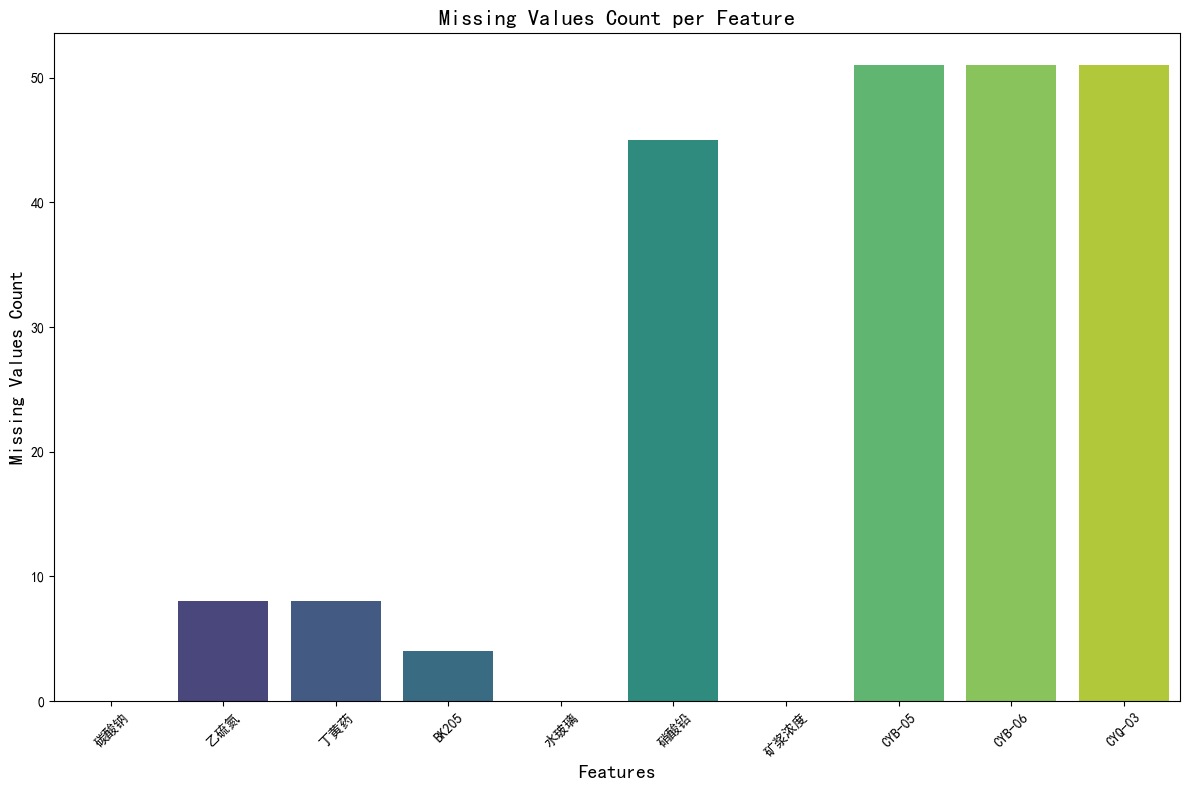

In [15]:
# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体（SimHei）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 统计每个特征中的缺失值数量
missing_values = x.isnull().sum()

# 设置图像大小
plt.figure(figsize=(12, 8))

# 绘制缺失值统计的条形图
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

# 添加标题和标签
plt.title('Missing Values Count per Feature', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Missing Values Count', fontsize=14)

# 旋转x轴标签，避免重叠
plt.xticks(rotation=45)

# 展示图像
plt.tight_layout()
plt.show()

In [16]:
# 填充缺失值为0
x_filled = x.fillna(0)

# 查看是否有缺失值
print(x_filled.isnull().sum())

碳酸钠       0
乙硫氮       0
丁黄药       0
BK205     0
水玻璃       0
硝酸铅       0
矿浆浓度      0
CYB-05    0
CYB-06    0
CYQ-03    0
dtype: int64


In [17]:
x_filled

,碳酸钠,乙硫氮,丁黄药,BK205,水玻璃,硝酸铅,矿浆浓度,CYB-05,CYB-06,CYQ-03
0,1000,80.0,40.0,30.0,0,0.0,42,0.0,0.0,0.0
1,1000,80.0,40.0,30.0,300,0.0,42,0.0,0.0,0.0
2,1000,80.0,40.0,30.0,600,0.0,42,0.0,0.0,0.0
3,1000,80.0,40.0,30.0,900,0.0,42,0.0,0.0,0.0
4,1000,80.0,40.0,30.0,1200,0.0,42,0.0,0.0,0.0
5,1000,80.0,40.0,30.0,1500,0.0,42,0.0,0.0,0.0
6,0,80.0,40.0,30.0,1000,0.0,42,0.0,0.0,0.0
7,400,80.0,40.0,30.0,1000,0.0,42,0.0,0.0,0.0
8,800,80.0,40.0,30.0,1000,0.0,42,0.0,0.0,0.0
9,1000,80.0,40.0,30.0,1000,0.0,42,0.0,0.0,0.0


In [18]:


# 初始化随机森林回归器
rf = RandomForestRegressor()

# 设置留一交叉验证
loo = LeaveOneOut()
# 保存每次分割的预测值和真实值
y_true = []
y_pred = []
# 执行留一交叉验证
for train_index, test_index in loo.split(x_filled):
    x_train, x_test = x_filled.iloc[train_index], x_filled.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    # 训练模型并预测
    rf.fit(x_train, y_train)
    y_pred.append(rf.predict(x_test)[0])
    y_true.append(y_test.values[0])

# 计算总体的 R^2 分数
overall_r2 = r2_score(y_true, y_pred)
print("平均 R^2 分数:", overall_r2)

平均 R^2 分数: 0.7136209433380425


In [19]:
# # 初始化留一交叉验证
# loo = LeaveOneOut()

# # 存储每个目标的 R^2 分数
# mean_r2_scores = {}

# # 对每个目标变量进行预测和计算 R^2
# for target in y.columns:
#     y_true, y_pred = [], []
#     rf = RandomForestRegressor(random_state=42)  # 每个目标单独的随机森林模型
    
#     for train_index, test_index in loo.split(x_filled):
#         # 划分训练集和测试集
#         x_train, x_test = x_filled.iloc[train_index], x_filled.iloc[test_index]
#         y_train, y_test = y[target].iloc[train_index], y[target].iloc[test_index]
        
#         # 训练模型
#         rf.fit(x_train, y_train)
        
#         # 预测并保存结果
#         y_pred_single = rf.predict(x_test)[0]
#         y_pred.append(y_pred_single)
#         y_true.append(y_test.values[0])

#     # 使用整体的真实值和预测值计算 R^2
#     mean_r2_scores[target] = r2_score(y_true, y_pred)
#     print(f"{target} 的平均 R^2 值: {mean_r2_scores[target]}")

# # 输出每个目标的平均 R^2 值
# print("所有目标的平均 R^2 值:", mean_r2_scores)

In [20]:
# 假设 rf_model 已经训练好用于预测 y1
def predict_bi_function_rf(new_data):
    
    # 将输入数据转换为 NumPy 数组
    new_data_numpy = new_data.cpu().numpy().astype(np.float64)
    
    # 将 NumPy 数组转换为 pandas DataFrame，并提供列名
    feature_names = ['碳酸钠', '乙硫氮', '丁黄药', 'BK205', '水玻璃', '硝酸铅', '矿浆浓度', 'CYB-05', 'CYB-06', 'CYQ-03']  # 根据特征名设定列名
    new_data_df = pd.DataFrame(new_data_numpy, columns=feature_names)
    
    # 使用随机森林模型进行预测，确保特征顺序正确
    Bi_pred = rf.predict(new_data_df[feature_names])
    
    # 将预测值转换为 PyTorch 张量，并返回 float64 类型
    return torch.tensor(Bi_pred, dtype=torch.float64)

In [21]:
# 定义每个维度的范围
dim_ranges = [
    (0, 1200),       # 第1维度范围
    (0, 120),     # 第2维度范围
    (0, 120),      # 第3维度范围
    (0, 50),   # 第4维度范围
    (0, 1500),    # 第5维度范围
    (0, 800),     # 第6维度范围
    (40, 60),       # 第7维度范围
    (0, 160),    # 第8维度范围
    (0, 160),    # 第9维度范围
    (0, 80)   # 第10维度范围
]

In [22]:
# 随机生成1000个点
n_samples = 1000
random_data = np.array([np.random.uniform(low, high, n_samples) for low, high in dim_ranges]).T
random_data_tensor = torch.tensor(random_data, dtype=torch.float64)

# 预测函数值
bi_predictions_rf = predict_bi_function_rf(random_data_tensor)

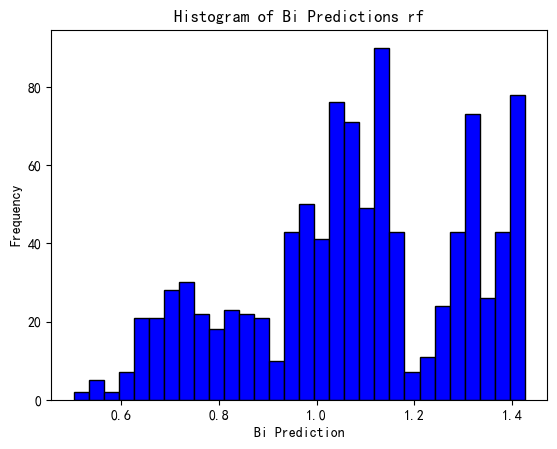

In [23]:
# 将预测结果转换为 NumPy 数组，绘制直方图
bi_predictions_np = bi_predictions_rf.numpy()
plt.hist(bi_predictions_np, bins=30, color='blue', edgecolor='black')
plt.xlabel('Bi Prediction')
plt.ylabel('Frequency')
plt.title('Histogram of Bi Predictions rf')
plt.show()

In [24]:
# 初始化 XGBoost 回归器
xgboost_model = XGBRegressor()

# 设置留一交叉验证
loo = LeaveOneOut()
# 保存每次分割的预测值和真实值
y_true = []
y_pred = []

# 执行留一交叉验证
for train_index, test_index in loo.split(x_filled):
    x_train, x_test = x_filled.iloc[train_index], x_filled.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    # 训练 XGBoost 模型并预测
    xgboost_model.fit(x_train, y_train)
    y_pred.append(xgboost_model.predict(x_test)[0])
    y_true.append(y_test.values[0])

# 计算总体的 R^2 分数
overall_r2 = r2_score(y_true, y_pred)
print("平均 R^2 分数:", overall_r2)

平均 R^2 分数: 0.8205324316712244


In [25]:
# 假设 rf_model 已经训练好用于预测 y1
def predict_bi_function_xg(new_data):
    
    # 将输入数据转换为 NumPy 数组
    new_data_numpy = new_data.cpu().numpy().astype(np.float64)
    
    # 将 NumPy 数组转换为 pandas DataFrame，并提供列名
    feature_names = ['碳酸钠', '乙硫氮', '丁黄药', 'BK205', '水玻璃', '硝酸铅', '矿浆浓度', 'CYB-05', 'CYB-06', 'CYQ-03']  # 根据特征名设定列名
    new_data_df = pd.DataFrame(new_data_numpy, columns=feature_names)
    
    # 使用随机森林模型进行预测，确保特征顺序正确
    Bi_pred = xgboost_model.predict(new_data_df[feature_names])
    
    # 将预测值转换为 PyTorch 张量，并返回 float64 类型
    return torch.tensor(Bi_pred, dtype=torch.float64)

In [26]:

# 预测函数值
bi_predictions_xg = predict_bi_function_xg(random_data_tensor)

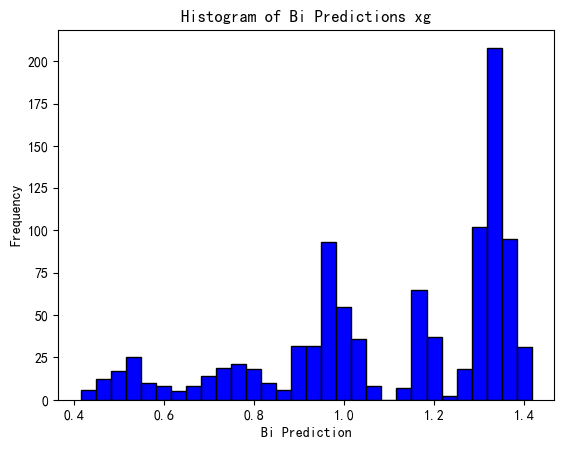

In [27]:
# 将预测结果转换为 NumPy 数组，绘制直方图
bi_predictions_np = bi_predictions_xg.numpy()
plt.hist(bi_predictions_np, bins=30, color='blue', edgecolor='black')
plt.xlabel('Bi Prediction')
plt.ylabel('Frequency')
plt.title('Histogram of Bi Predictions xg')
plt.show()

In [28]:
# # 创建平方特征
# poly = PolynomialFeatures(degree=2, include_bias=False)
# x_with_poly = poly.fit_transform(x_filled)  # 包含原始特征和平方特征

# # 标准化
# scaler = StandardScaler()
# x_scaled_poly = scaler.fit_transform(x_with_poly)

# # 初始化 Lasso 回归器
# lasso_model = Lasso()

# # 设置留一交叉验证
# loo = LeaveOneOut()
# # 保存每次分割的预测值和真实值
# y_true = []
# y_pred = []

# # 执行留一交叉验证
# for train_index, test_index in loo.split(x_scaled_poly):
#     x_train, x_test = x_scaled_poly[train_index], x_scaled_poly[test_index]
#     y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
#     # 训练 Lasso 模型并预测
#     lasso_model.fit(x_train, y_train)
#     y_pred.append(lasso_model.predict(x_test)[0])
#     y_true.append(y_test.values[0])

# # 计算总体的 R^2 分数
# overall_r2 = r2_score(y_true, y_pred)
# print("平均 R^2 分数:", overall_r2)

In [29]:
# # 假设 rf_model 是之前已经训练好的模型
# def predict_mo_function(new_data):

    
#     # 将输入数据转换为 NumPy 数组
#     new_data_numpy = new_data.cpu().numpy().astype(np.float64)
    
#     # 将 NumPy 数组转换为 pandas DataFrame，并提供列名
#     feature_names = ['碳酸钠', '乙硫氮', '丁黄药', 'BK205', '水玻璃',  '硝酸铅', '矿浆浓度', 'CYB-05', 'CYB-06', 'CYQ-03']  # 根据特征名设定列名
#     new_data_df = pd.DataFrame(new_data_numpy, columns=feature_names)
    
#     # 使用随机森林模型进行预测，确保特征顺序正确
#     Mo_pred = rf.predict(new_data_df[['碳酸钠', '乙硫氮', '丁黄药', 'BK205', '水玻璃',  '硝酸铅', '矿浆浓度', 'CYB-05', 'CYB-06', 'CYQ-03']])
    
#     # 将预测值转换为 PyTorch 张量，并返回 float64 类型
#     return torch.tensor(Mo_pred, dtype=torch.float64)

In [30]:
def generate_random_tensor_batch(dim_ranges, num_samples=5):
    """
    随机生成一个二维张量，每行是一个10维数据，每个维度有单独的区间范围。

    参数:
    dim_ranges (list of tuples): 每个元素是一个包含(min, max)的元组，表示该维度的范围。
    num_samples (int): 每次生成的样本数，默认是5。

    返回:
    torch.Tensor: 生成的二维张量，形状为(num_samples, 10)，dtype=torch.float64, device='cuda:0'。
    """
    data = []
    for _ in range(num_samples):
        sample = [torch.DoubleTensor(1).uniform_(low, high).item() for low, high in dim_ranges]
        data.append(sample)
    tensor_batch = torch.tensor(data, device='cuda:0', dtype=torch.float64)
    return tensor_batch





In [31]:
# 生成十次，每次生成一个5x10的二维张量
tensors = [generate_random_tensor_batch(dim_ranges) for _ in range(10)]


In [32]:
tensors

[tensor([[3.4184e+02, 1.9690e+00, 9.8791e+01, 3.7921e+01, 7.5024e+02, 2.0982e+02,
          5.3923e+01, 7.5682e+01, 1.4006e+02, 1.9229e+01],
         [3.6221e+02, 1.2058e+00, 5.6277e+01, 4.0617e+01, 1.0702e+03, 7.9879e+02,
          5.8215e+01, 1.5645e+01, 1.4941e+02, 5.1372e+01],
         [8.5012e+02, 6.2660e+01, 1.4704e+01, 2.6075e+01, 1.1994e+03, 5.8682e+02,
          4.3437e+01, 5.0589e+01, 2.1980e+01, 8.3418e+00],
         [9.9788e+02, 8.6128e+01, 8.2381e+01, 2.0644e+01, 1.3724e+03, 5.7371e+02,
          5.0069e+01, 5.4028e+01, 1.4771e+02, 4.9593e+01],
         [6.4233e+02, 1.1346e+02, 3.4487e+01, 2.5174e+00, 8.2257e+02, 3.7235e+01,
          4.6280e+01, 6.7757e+01, 8.1175e+01, 9.9483e+00]], device='cuda:0',
        dtype=torch.float64),
 tensor([[8.7163e+01, 3.5610e+00, 1.7020e+01, 1.1857e+01, 1.1409e+03, 2.9783e+02,
          4.7401e+01, 2.8070e+01, 8.0562e+01, 7.9235e+01],
         [1.1215e+03, 8.1793e+01, 1.2646e+01, 7.2920e+00, 1.1105e+03, 7.1397e+01,
          4.3776e+01, 4.

In [33]:
initial_points_task11 = tensors
initial_points_task22 = None  # 如果你没有任务2的初始点，可以设置为 None


In [34]:
initial_points_task11

[tensor([[3.4184e+02, 1.9690e+00, 9.8791e+01, 3.7921e+01, 7.5024e+02, 2.0982e+02,
          5.3923e+01, 7.5682e+01, 1.4006e+02, 1.9229e+01],
         [3.6221e+02, 1.2058e+00, 5.6277e+01, 4.0617e+01, 1.0702e+03, 7.9879e+02,
          5.8215e+01, 1.5645e+01, 1.4941e+02, 5.1372e+01],
         [8.5012e+02, 6.2660e+01, 1.4704e+01, 2.6075e+01, 1.1994e+03, 5.8682e+02,
          4.3437e+01, 5.0589e+01, 2.1980e+01, 8.3418e+00],
         [9.9788e+02, 8.6128e+01, 8.2381e+01, 2.0644e+01, 1.3724e+03, 5.7371e+02,
          5.0069e+01, 5.4028e+01, 1.4771e+02, 4.9593e+01],
         [6.4233e+02, 1.1346e+02, 3.4487e+01, 2.5174e+00, 8.2257e+02, 3.7235e+01,
          4.6280e+01, 6.7757e+01, 8.1175e+01, 9.9483e+00]], device='cuda:0',
        dtype=torch.float64),
 tensor([[8.7163e+01, 3.5610e+00, 1.7020e+01, 1.1857e+01, 1.1409e+03, 2.9783e+02,
          4.7401e+01, 2.8070e+01, 8.0562e+01, 7.9235e+01],
         [1.1215e+03, 8.1793e+01, 1.2646e+01, 7.2920e+00, 1.1105e+03, 7.1397e+01,
          4.3776e+01, 4.

In [35]:
def fit_gp_model_and_select_next_point(train_x, train_obj, device):
    # 创建和拟合高斯过程模型
    model = SingleTaskGP(
        train_X=train_x,
        train_Y=train_obj,
        input_transform=Normalize(d=train_x.shape[1]),  # 使用输入的维度
        outcome_transform=Standardize(m=1),  # 输出为一维
    ).to(device)

    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    fit_gpytorch_mll(mll)

    # 找到当前最优值
    best_value = train_obj.max()
    X_baseline = train_x[train_obj.flatten() == best_value.item()]

    qLogNEI = qLogNoisyExpectedImprovement(model=model, best_f=best_value, X_baseline=X_baseline)

    # 设置每个维度的上下界
    dim_ranges = [
        (0, 1200),    # 第1维度范围
        (0, 120),     # 第2维度范围
        (0, 120),     # 第3维度范围
        (0, 50),      # 第4维度范围
        (0, 1500),    # 第5维度范围
        (0, 800),     # 第6维度范围
        (40, 60),     # 第7维度范围
        (0, 160),     # 第8维度范围
        (0, 160),     # 第9维度范围
        (0, 80)       # 第10维度范围
    ]
    
    lower_bounds = [dim[0] for dim in dim_ranges]
    upper_bounds = [dim[1] for dim in dim_ranges]
    
    bounds = torch.tensor([lower_bounds, upper_bounds], device=device, dtype=torch.float64)
    
    new_point_analytic, _ = optimize_acqf(
        acq_function=qLogNEI,
        bounds=bounds,
        q=1,  # 采样一个点
        num_restarts=20,
        raw_samples=100,
        options={},
    )
    
    return new_point_analytic.squeeze(0)

In [36]:
results1 = Hartmannb.bayesian_optimization_experiment(
    num_experiments=10,
    n=25,
    obj_fn1=predict_bi_function_xg,

    obj_fn3=predict_bi_function_xg,
    initial_points_task1=initial_points_task11,  # 传递生成的初始样本
    initial_points_task2=initial_points_task22,  # 传递生成的初始样本
    fit_task_fn=fit_gp_model_and_select_next_point,
    device='cuda',
    task_type='single'  # 表示运行单任务模型
)


tensor([[3.4184e+02, 1.9690e+00, 9.8791e+01, 3.7921e+01, 7.5024e+02, 2.0982e+02,
         5.3923e+01, 7.5682e+01, 1.4006e+02, 1.9229e+01],
        [3.6221e+02, 1.2058e+00, 5.6277e+01, 4.0617e+01, 1.0702e+03, 7.9879e+02,
         5.8215e+01, 1.5645e+01, 1.4941e+02, 5.1372e+01],
        [8.5012e+02, 6.2660e+01, 1.4704e+01, 2.6075e+01, 1.1994e+03, 5.8682e+02,
         4.3437e+01, 5.0589e+01, 2.1980e+01, 8.3418e+00],
        [9.9788e+02, 8.6128e+01, 8.2381e+01, 2.0644e+01, 1.3724e+03, 5.7371e+02,
         5.0069e+01, 5.4028e+01, 1.4771e+02, 4.9593e+01],
        [6.4233e+02, 1.1346e+02, 3.4487e+01, 2.5174e+00, 8.2257e+02, 3.7235e+01,
         4.6280e+01, 6.7757e+01, 8.1175e+01, 9.9483e+00]], device='cuda:0',
       dtype=torch.float64)
Nr. of optimization run: 0
New candidates are: tensor([[692.5402, 102.0307,  30.0148,   7.8911, 911.6174, 164.9416,  45.6230,
          63.7569,  67.7788,   9.7425]], device='cuda:0', dtype=torch.float64)
Iteration 0 took 7.16 seconds
Nr. of optimization run:

In [37]:
def generate_initial_samples(num_samples, dim_ranges):
    # 选择计算设备
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    dtype = torch.double
    
    # 从 dim_ranges 中提取每个维度的上下限并转换为张量
    lower_bounds = torch.tensor([lower for lower, upper in dim_ranges], dtype=dtype, device=device).clone().detach()
    upper_bounds = torch.tensor([upper for lower, upper in dim_ranges], dtype=dtype, device=device).clone().detach()
    
    # 计算维度数量
    dim = len(dim_ranges)
    
    # 创建 Sobol 序列生成器
    sobol_engine = torch.quasirandom.SobolEngine(dim, scramble=True, seed=None)
    
    # 生成 Sobol 样本点
    train_x = sobol_engine.draw(num_samples).to(device, dtype=dtype)

    # 将 Sobol 点映射到每个维度的指定范围内
    train_x = lower_bounds + (upper_bounds - lower_bounds) * train_x

    return train_x


In [38]:
num_samples = 1  # 样本数量
dim_ranges = [
    (0, 1200),    # 第1维度范围
    (0, 120),     # 第2维度范围
    (0, 120),     # 第3维度范围
    (0, 50),      # 第4维度范围
    (0, 1500),    # 第5维度范围
    (0, 800),     # 第6维度范围
    (40, 60),     # 第7维度范围
    (0, 160),     # 第8维度范围
    (0, 160),     # 第9维度范围
    (0, 80)       # 第10维度范围
]

samples = generate_initial_samples(num_samples, dim_ranges)
print(samples)

tensor([[740.4133,  81.2390,  71.2741,  47.7964, 999.6783, 130.5784,  43.1893,
         120.5146, 100.7689,  62.0057]], device='cuda:0', dtype=torch.float64)


In [39]:
def fit_gp_model_and_select_next_point2(train_x, train_obj, device):
        # 生成样本点
    initial_samples_np = generate_initial_samples(num_samples, dim_ranges)
    
    # 转换为张量
    initial_samples_tensor = torch.tensor(initial_samples_np, dtype=torch.float64)
    return initial_samples_tensor.squeeze(0)

In [40]:
results2 = Hartmannb.bayesian_optimization_experiment(
    num_experiments=10,
    n=25,
    obj_fn1=predict_bi_function_xg,
    obj_fn3=predict_bi_function_xg,
    initial_points_task1=initial_points_task11,  # 传递生成的初始样本
    initial_points_task2=initial_points_task22,  # 传递生成的初始样本
    fit_task_fn=fit_gp_model_and_select_next_point2,
    device='cuda',
    task_type='single'  # 表示运行单任务模型
)

tensor([[3.4184e+02, 1.9690e+00, 9.8791e+01, 3.7921e+01, 7.5024e+02, 2.0982e+02,
         5.3923e+01, 7.5682e+01, 1.4006e+02, 1.9229e+01],
        [3.6221e+02, 1.2058e+00, 5.6277e+01, 4.0617e+01, 1.0702e+03, 7.9879e+02,
         5.8215e+01, 1.5645e+01, 1.4941e+02, 5.1372e+01],
        [8.5012e+02, 6.2660e+01, 1.4704e+01, 2.6075e+01, 1.1994e+03, 5.8682e+02,
         4.3437e+01, 5.0589e+01, 2.1980e+01, 8.3418e+00],
        [9.9788e+02, 8.6128e+01, 8.2381e+01, 2.0644e+01, 1.3724e+03, 5.7371e+02,
         5.0069e+01, 5.4028e+01, 1.4771e+02, 4.9593e+01],
        [6.4233e+02, 1.1346e+02, 3.4487e+01, 2.5174e+00, 8.2257e+02, 3.7235e+01,
         4.6280e+01, 6.7757e+01, 8.1175e+01, 9.9483e+00]], device='cuda:0',
       dtype=torch.float64)
Nr. of optimization run: 0
New candidates are: tensor([[880.8672,  39.5539, 109.7672,  12.1504,  11.8141, 583.5682,  45.6444,
         131.5381, 131.7804,  47.7474]], device='cuda:0', dtype=torch.float64)
Iteration 0 took 0.00 seconds
Nr. of optimization run:

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

Nr. of optimization run: 15
New candidates are: tensor([[232.2633,  55.0773, 103.4264,  45.8771, 403.0608, 419.4045,  46.4833,
         145.8808,  54.8558,  16.9999]], device='cuda:0', dtype=torch.float64)
Iteration 15 took 0.02 seconds
Nr. of optimization run: 16
New candidates are: tensor([[  86.7825,   56.1746,   67.0735,    2.6770, 1054.1288,  574.6471,
           56.2753,   11.6867,   49.0649,    6.6608]], device='cuda:0',
       dtype=torch.float64)
Iteration 16 took 0.01 seconds
Nr. of optimization run: 17
New candidates are: tensor([[  5.8395,  76.2677,  44.4413,  49.8637, 692.6647, 344.4141,  47.1091,
          84.8393,  20.6194,  39.8764]], device='cuda:0', dtype=torch.float64)
Iteration 17 took 0.02 seconds
Nr. of optimization run: 18
New candidates are: tensor([[735.0504,  77.9539,  26.6030,  44.2644, 788.5017, 574.9083,  44.5221,
          99.3294,  36.0339,  39.0462]], device='cuda:0', dtype=torch.float64)
Iteration 18 took 0.00 seconds
Nr. of optimization run: 19
New can

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

Nr. of optimization run: 7
New candidates are: tensor([[ 322.9507,   90.5945,   59.3505,   29.6812, 1033.8936,  327.4425,
           46.3043,  144.7007,   62.4898,   66.3664]], device='cuda:0',
       dtype=torch.float64)
Iteration 7 took 0.01 seconds
Nr. of optimization run: 8
New candidates are: tensor([[1000.0576,    7.9669,   26.1754,   32.3949,  529.6651,  716.0182,
           47.9277,   28.2217,  111.1341,   74.9089]], device='cuda:0',
       dtype=torch.float64)
Iteration 8 took 0.02 seconds
Nr. of optimization run: 9
New candidates are: tensor([[7.6515e+02, 4.0047e-01, 3.2792e+01, 4.0361e+01, 1.0135e+03, 5.7196e+02,
         5.8909e+01, 1.5536e+02, 8.4502e+01, 7.7237e+01]], device='cuda:0',
       dtype=torch.float64)
Iteration 9 took 0.00 seconds
Nr. of optimization run: 10
New candidates are: tensor([[1047.2663,   76.6163,   53.4558,   43.7225,  780.5066,  477.7234,
           44.5570,   91.9842,    8.3334,   26.4111]], device='cuda:0',
       dtype=torch.float64)
Iteration 1

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

Nr. of optimization run: 1
New candidates are: tensor([[1.1033e+03, 3.9688e-01, 7.8742e+01, 1.7979e+00, 1.1685e+03, 1.0698e+02,
         4.0343e+01, 3.2372e+01, 3.8698e+01, 3.1852e+01]], device='cuda:0',
       dtype=torch.float64)
Iteration 1 took 0.02 seconds
Nr. of optimization run: 2
New candidates are: tensor([[ 923.2198,   65.7967,  109.2990,   24.7870, 1469.5474,  236.9924,
           55.8933,  154.9544,   78.9359,    2.0778]], device='cuda:0',
       dtype=torch.float64)
Iteration 2 took 0.00 seconds
Nr. of optimization run: 3
New candidates are: tensor([[ 486.7327,   97.2149,   45.4034,    5.8261, 1456.3628,  542.9847,
           44.3601,  112.9864,   92.8104,   38.5697]], device='cuda:0',
       dtype=torch.float64)
Iteration 3 took 0.01 seconds
Nr. of optimization run: 4
New candidates are: tensor([[ 323.6258,   79.9807,   18.5462,    4.3013, 1267.1904,   41.5582,
           46.1712,  154.9080,   93.1631,   43.0481]], device='cuda:0',
       dtype=torch.float64)
Iteration 4 

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

Nr. of optimization run: 22
New candidates are: tensor([[890.9104,  61.2629,  30.0504,  26.8039, 734.5144, 152.2962,  46.2029,
          38.0291, 154.2347,  44.0770]], device='cuda:0', dtype=torch.float64)
Iteration 22 took 0.01 seconds
Nr. of optimization run: 23
New candidates are: tensor([[615.5395,  67.9985,  40.8787,   4.4018, 846.5736, 317.6197,  50.9569,
         157.6000,  65.2690,  66.9952]], device='cuda:0', dtype=torch.float64)
Iteration 23 took 0.00 seconds
Nr. of optimization run: 24
New candidates are: tensor([[1053.6294,   27.2379,   75.0113,   46.1929, 1151.1587,  328.4516,
           40.0467,   98.3047,   82.2185,   24.6214]], device='cuda:0',
       dtype=torch.float64)
Iteration 24 took 0.02 seconds
最优点: [1.3686450719833374, 1.3686450719833374, 1.3686450719833374, 1.3686450719833374, 1.3686450719833374, 1.3686450719833374, 1.3686450719833374, 1.3872469663619995, 1.3872469663619995, 1.3872469663619995, 1.3872469663619995, 1.3872469663619995, 1.3872469663619995, 1.3872

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

Nr. of optimization run: 1
New candidates are: tensor([[ 708.2321,   53.4551,   91.2011,   22.0643, 1033.1778,  202.2253,
           53.2007,  123.8823,   62.3300,   19.8959]], device='cuda:0',
       dtype=torch.float64)
Iteration 1 took 0.02 seconds
Nr. of optimization run: 2
New candidates are: tensor([[ 142.6315,   82.9258,   81.4943,   14.3591, 1005.0096,  517.3536,
           53.4457,  143.6667,  159.1741,   50.0466]], device='cuda:0',
       dtype=torch.float64)
Iteration 2 took 0.00 seconds
Nr. of optimization run: 3
New candidates are: tensor([[917.9288, 110.0273,  96.4044,  15.5786,  30.6317, 756.2915,  55.4783,
         156.5106, 125.3202,  41.7220]], device='cuda:0', dtype=torch.float64)
Iteration 3 took 0.01 seconds
Nr. of optimization run: 4
New candidates are: tensor([[ 53.6783,  47.9130, 104.2577,  44.0827, 856.7141, 466.6686,  44.3927,
           8.9013, 133.0413,  27.3523]], device='cuda:0', dtype=torch.float64)
Iteration 4 took 0.02 seconds
Nr. of optimization run: 5

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

Nr. of optimization run: 6
New candidates are: tensor([[  6.7263, 106.6896,  20.3811,  16.2972,  13.8858, 373.2128,  57.9539,
          11.8795, 129.9229,  20.0674]], device='cuda:0', dtype=torch.float64)
Iteration 6 took 0.02 seconds
Nr. of optimization run: 7
New candidates are: tensor([[287.0863,  34.1385,  26.9258,   2.3953, 517.5308, 431.6168,  59.2639,
         146.5899, 121.1874,  36.3864]], device='cuda:0', dtype=torch.float64)
Iteration 7 took 0.02 seconds
Nr. of optimization run: 8
New candidates are: tensor([[243.5015,  62.4025,  80.1816,  27.5489, 802.7036, 153.6331,  53.1042,
          80.3581,  39.4661,  35.3117]], device='cuda:0', dtype=torch.float64)
Iteration 8 took 0.01 seconds
Nr. of optimization run: 9
New candidates are: tensor([[633.8848,  49.0251,  63.6434,  48.7608, 424.3890, 172.6764,  59.0005,
          19.5010, 104.4473,  19.8931]], device='cuda:0', dtype=torch.float64)
Iteration 9 took 0.00 seconds
Nr. of optimization run: 10
New candidates are: tensor([[475

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

Nr. of optimization run: 0
New candidates are: tensor([[ 80.9774,  57.0815,  51.3614,  19.7722, 806.8362, 653.6837,  43.0532,
          76.5456,   3.6371,  34.4483]], device='cuda:0', dtype=torch.float64)
Iteration 0 took 0.00 seconds
Nr. of optimization run: 1
New candidates are: tensor([[ 146.3703,   54.5027,  115.4227,    9.6772, 1415.9367,  276.3376,
           41.6262,   29.1981,   49.7647,   31.8600]], device='cuda:0',
       dtype=torch.float64)
Iteration 1 took 0.02 seconds
Nr. of optimization run: 2
New candidates are: tensor([[125.4193,   3.8824,  73.7294,  13.9776, 511.6325, 183.0098,  57.9525,
          34.3588,  61.1184,  57.5742]], device='cuda:0', dtype=torch.float64)
Iteration 2 took 0.02 seconds
Nr. of optimization run: 3
New candidates are: tensor([[582.8564,  55.0633,  98.7274,  34.6660, 226.8829, 141.1359,  51.1198,
          20.3567,  74.9637,  67.9327]], device='cuda:0', dtype=torch.float64)
Iteration 3 took 0.00 seconds
Nr. of optimization run: 4
New candidates a

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

Nr. of optimization run: 13
New candidates are: tensor([[ 792.5270,   92.9274,   17.4456,   31.3324, 1131.7423,  145.7962,
           54.9527,    7.8879,   13.5031,   31.6844]], device='cuda:0',
       dtype=torch.float64)
Iteration 13 took 0.02 seconds
Nr. of optimization run: 14
New candidates are: tensor([[235.0760, 117.6933,  10.3063,  21.2299, 878.3329, 555.9921,  57.4121,
          80.7648, 146.6102,  50.4492]], device='cuda:0', dtype=torch.float64)
Iteration 14 took 0.01 seconds
Nr. of optimization run: 15
New candidates are: tensor([[1.1963e+03, 1.1293e+02, 5.8984e-01, 1.4083e+01, 7.8979e+02, 2.6842e+02,
         4.3266e+01, 7.3029e+00, 5.1320e+01, 6.1442e+01]], device='cuda:0',
       dtype=torch.float64)
Iteration 15 took 0.00 seconds
Nr. of optimization run: 16
New candidates are: tensor([[ 962.8834,   96.7512,   87.3006,   48.2752, 1143.6369,  489.5415,
           46.8863,   49.6487,  147.9991,   20.6818]], device='cuda:0',
       dtype=torch.float64)
Iteration 16 took 0.02

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

New candidates are: tensor([[584.6441,  89.4157,  41.0487,  48.3042, 984.9341, 280.2737,  46.6234,
          33.3355, 101.9074,   1.8921]], device='cuda:0', dtype=torch.float64)
Iteration 5 took 0.01 seconds
Nr. of optimization run: 6
New candidates are: tensor([[529.8660,  11.9198,   4.5401,  45.1664, 546.6890, 635.4683,  42.0380,
          60.6889,  28.1619,   6.3064]], device='cuda:0', dtype=torch.float64)
Iteration 6 took 0.00 seconds
Nr. of optimization run: 7
New candidates are: tensor([[ 395.1941,   56.0213,   38.9446,   24.0556, 1336.7481,   71.2302,
           41.5003,  126.5332,  120.9649,   57.3811]], device='cuda:0',
       dtype=torch.float64)
Iteration 7 took 0.02 seconds
Nr. of optimization run: 8
New candidates are: tensor([[1166.4233,   68.8221,    6.9464,   35.9425,  488.8623,  155.6820,
           41.1541,  105.2949,   33.4966,   79.1427]], device='cuda:0',
       dtype=torch.float64)
Iteration 8 took 0.03 seconds
Nr. of optimization run: 9
New candidates are: tensor

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

New candidates are: tensor([[1082.1278,    3.4985,   22.9597,    3.4987,  983.4605,  309.8914,
           56.5905,  103.0934,  138.7514,   23.7681]], device='cuda:0',
       dtype=torch.float64)
Iteration 22 took 0.01 seconds
Nr. of optimization run: 23
New candidates are: tensor([[187.7040,   9.7963,  77.7692,   4.5587, 818.8813, 201.3584,  49.5221,
          72.4938,  99.8067,  33.3423]], device='cuda:0', dtype=torch.float64)
Iteration 23 took 0.02 seconds
Nr. of optimization run: 24
New candidates are: tensor([[1129.5383,   65.0644,    3.3649,   28.0084,  804.0414,  422.7891,
           40.4678,    4.6792,   27.3703,   49.4104]], device='cuda:0',
       dtype=torch.float64)
Iteration 24 took 0.00 seconds
最优点: [0.9895653128623962, 0.9895653128623962, 0.9895653128623962, 1.2919471263885498, 1.3033850193023682, 1.322786569595337, 1.322786569595337, 1.322786569595337, 1.322786569595337, 1.3950504064559937, 1.3950504064559937, 1.3950504064559937, 1.3950504064559937, 1.3950504064559937, 1

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

New candidates are: tensor([[ 135.7055,  111.8474,  107.5304,   37.3160, 1205.6019,  576.1996,
           43.4927,   70.3508,    4.4681,    5.4590]], device='cuda:0',
       dtype=torch.float64)
Iteration 15 took 0.01 seconds
Nr. of optimization run: 16
New candidates are: tensor([[8.4259e+02, 2.0557e+01, 2.7699e-01, 1.1589e+01, 9.6399e+02, 1.6233e+02,
         4.6573e+01, 4.4584e+01, 5.4979e+01, 3.8788e+00]], device='cuda:0',
       dtype=torch.float64)
Iteration 16 took 0.02 seconds
Nr. of optimization run: 17
New candidates are: tensor([[ 813.9955,   11.4123,  110.5407,    7.7483, 1047.8946,  674.0179,
           54.4203,  152.7387,   51.6457,   69.1379]], device='cuda:0',
       dtype=torch.float64)
Iteration 17 took 0.01 seconds
Nr. of optimization run: 18
New candidates are: tensor([[ 724.0251,    4.5664,   46.3714,   27.1162, 1234.4288,  650.7005,
           58.9600,   77.7625,   12.7726,   28.0989]], device='cuda:0',
       dtype=torch.float64)
Iteration 18 took 0.00 seconds
Nr

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

Nr. of optimization run: 7
New candidates are: tensor([[1086.7943,   76.8302,   77.3129,    1.5916,  428.7095,  490.7070,
           48.2846,   52.5755,  116.2657,   47.0692]], device='cuda:0',
       dtype=torch.float64)
Iteration 7 took 0.02 seconds
Nr. of optimization run: 8
New candidates are: tensor([[ 824.0052,  112.1696,   52.4748,   20.0359, 1185.0488,  516.8709,
           54.1139,  133.2822,   79.2071,   79.2389]], device='cuda:0',
       dtype=torch.float64)
Iteration 8 took 0.02 seconds
Nr. of optimization run: 9
New candidates are: tensor([[ 439.6671,   19.5915,   88.0446,   38.1007, 1194.2020,  356.9663,
           52.4997,   56.0505,  101.2275,   59.9702]], device='cuda:0',
       dtype=torch.float64)
Iteration 9 took 0.00 seconds
Nr. of optimization run: 10
New candidates are: tensor([[973.3023,  89.7441,  32.6959,  49.8566, 817.0017, 434.2860,  57.7368,
         136.6063,  21.4027,  29.5029]], device='cuda:0', dtype=torch.float64)
Iteration 10 took 0.01 seconds
Nr. of 

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\845368171.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

In [41]:
def shiyanfangfa(dim_ranges, num_samples=5):
    samples = []
    
    for _ in range(num_samples):
        point = []
        for lower, upper in dim_ranges:
            # 将区间四等分
            step = (upper - lower) / 4
            candidate_values = [lower + i * step for i in range(5)]  # 四等分包含端点
            
            # 随机选择一个候选值
            selected_value = random.choice(candidate_values)
            point.append(selected_value)
        
        samples.append(point)
    
    # 转换为 Tensor 格式
    return torch.tensor(samples, dtype=torch.double)


In [42]:
def fit_gp_model_and_select_next_point3(train_x, train_obj, device):
        # 生成样本点
    initial_samples_np = shiyanfangfa(dim_ranges, num_samples=1)
    
    # 转换为张量
    initial_samples_tensor = torch.tensor(initial_samples_np, dtype=torch.float64)
    return initial_samples_tensor.squeeze(0)

In [43]:
initial_points_task33 = []
for _ in range(10):
    batch_samples = shiyanfangfa(dim_ranges, num_samples=5)
    initial_points_task33.append(batch_samples)

# 打印生成的样本
for i, batch in enumerate(initial_points_task33):
    print(f"Batch {i + 1}:\n{batch}\n")

Batch 1:
tensor([[ 600.0000,    0.0000,    0.0000,    0.0000,  375.0000,  800.0000,
           55.0000,  120.0000,    0.0000,   20.0000],
        [ 900.0000,   90.0000,  120.0000,   50.0000,  375.0000,    0.0000,
           60.0000,   40.0000,  120.0000,   60.0000],
        [1200.0000,   30.0000,   60.0000,   50.0000,  375.0000,  600.0000,
           40.0000,  160.0000,  160.0000,    0.0000],
        [ 300.0000,    0.0000,  120.0000,   37.5000,  375.0000,  400.0000,
           40.0000,  120.0000,  160.0000,   20.0000],
        [1200.0000,  120.0000,   30.0000,   37.5000,  375.0000,  400.0000,
           40.0000,  160.0000,  120.0000,   40.0000]], dtype=torch.float64)

Batch 2:
tensor([[ 900.0000,   60.0000,    0.0000,   50.0000,  750.0000,    0.0000,
           45.0000,    0.0000,   80.0000,   40.0000],
        [   0.0000,   60.0000,    0.0000,   25.0000,    0.0000,  400.0000,
           40.0000,   40.0000,    0.0000,   80.0000],
        [ 900.0000,    0.0000,    0.0000,    0.0000,    

In [44]:
initial_points_task33

[tensor([[ 600.0000,    0.0000,    0.0000,    0.0000,  375.0000,  800.0000,
            55.0000,  120.0000,    0.0000,   20.0000],
         [ 900.0000,   90.0000,  120.0000,   50.0000,  375.0000,    0.0000,
            60.0000,   40.0000,  120.0000,   60.0000],
         [1200.0000,   30.0000,   60.0000,   50.0000,  375.0000,  600.0000,
            40.0000,  160.0000,  160.0000,    0.0000],
         [ 300.0000,    0.0000,  120.0000,   37.5000,  375.0000,  400.0000,
            40.0000,  120.0000,  160.0000,   20.0000],
         [1200.0000,  120.0000,   30.0000,   37.5000,  375.0000,  400.0000,
            40.0000,  160.0000,  120.0000,   40.0000]], dtype=torch.float64),
 tensor([[ 900.0000,   60.0000,    0.0000,   50.0000,  750.0000,    0.0000,
            45.0000,    0.0000,   80.0000,   40.0000],
         [   0.0000,   60.0000,    0.0000,   25.0000,    0.0000,  400.0000,
            40.0000,   40.0000,    0.0000,   80.0000],
         [ 900.0000,    0.0000,    0.0000,    0.0000,    0.0

In [45]:
results3 = Hartmannb.bayesian_optimization_experiment(
    num_experiments=10,
    n=25,
    obj_fn1=predict_bi_function_xg,
    obj_fn3=predict_bi_function_xg,
    initial_points_task1=initial_points_task33,  # 传递生成的初始样本
    initial_points_task2=initial_points_task22,  # 传递生成的初始样本
    fit_task_fn=fit_gp_model_and_select_next_point3,
    device='cuda',
    task_type='single'  # 表示运行单任务模型
)

tensor([[ 600.0000,    0.0000,    0.0000,    0.0000,  375.0000,  800.0000,
           55.0000,  120.0000,    0.0000,   20.0000],
        [ 900.0000,   90.0000,  120.0000,   50.0000,  375.0000,    0.0000,
           60.0000,   40.0000,  120.0000,   60.0000],
        [1200.0000,   30.0000,   60.0000,   50.0000,  375.0000,  600.0000,
           40.0000,  160.0000,  160.0000,    0.0000],
        [ 300.0000,    0.0000,  120.0000,   37.5000,  375.0000,  400.0000,
           40.0000,  120.0000,  160.0000,   20.0000],
        [1200.0000,  120.0000,   30.0000,   37.5000,  375.0000,  400.0000,
           40.0000,  160.0000,  120.0000,   40.0000]], device='cuda:0',
       dtype=torch.float64)
Nr. of optimization run: 0
New candidates are: tensor([[ 300.,   30.,   60.,   25., 1500.,  400.,   40.,  120.,  120.,   60.]],
       device='cuda:0', dtype=torch.float64)
Iteration 0 took 0.00 seconds
Nr. of optimization run: 1
New candidates are: tensor([[300.,  30.,   0.,  50., 375.,   0.,  40.,  40., 16

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

Nr. of optimization run: 20
New candidates are: tensor([[ 600.0000,   60.0000,   60.0000,   12.5000, 1500.0000,  600.0000,
           40.0000,   80.0000,    0.0000,   60.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 20 took 0.01 seconds
Nr. of optimization run: 21
New candidates are: tensor([[1200.0000,  120.0000,   60.0000,   37.5000,  375.0000,  600.0000,
           50.0000,  160.0000,    0.0000,   60.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 21 took 0.00 seconds
Nr. of optimization run: 22
New candidates are: tensor([[  0.0000,  30.0000,  90.0000,  12.5000, 750.0000, 200.0000,  45.0000,
         160.0000, 160.0000,  60.0000]], device='cuda:0', dtype=torch.float64)
Iteration 22 took 0.02 seconds
Nr. of optimization run: 23
New candidates are: tensor([[ 600.,   30.,   60.,   50., 1125.,  800.,   40.,  120.,  160.,   60.]],
       device='cuda:0', dtype=torch.float64)
Iteration 23 took 0.00 seconds
Nr. of optimization run: 24
New candidates are: te

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

New candidates are: tensor([[ 600.,   90.,  120.,   50., 1125.,    0.,   40.,   40.,  120.,   60.]],
       device='cuda:0', dtype=torch.float64)
Iteration 13 took 0.01 seconds
Nr. of optimization run: 14
New candidates are: tensor([[ 600.,   60.,   90.,    0., 1500.,  200.,   55.,   40.,    0.,   80.]],
       device='cuda:0', dtype=torch.float64)
Iteration 14 took 0.02 seconds
Nr. of optimization run: 15
New candidates are: tensor([[1200.0000,   30.0000,   60.0000,   12.5000,  750.0000,  600.0000,
           40.0000,  160.0000,  160.0000,   20.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 15 took 0.02 seconds
Nr. of optimization run: 16
New candidates are: tensor([[ 900.0000,   90.0000,   60.0000,   37.5000, 1500.0000,    0.0000,
           40.0000,  160.0000,   40.0000,    0.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 16 took 0.00 seconds
Nr. of optimization run: 17
New candidates are: tensor([[ 900.0000,  120.0000,    0.0000,   12.5000, 1500.0000

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

Nr. of optimization run: 8
New candidates are: tensor([[1200.0000,   90.0000,   90.0000,   12.5000,  750.0000,  600.0000,
           60.0000,   40.0000,  160.0000,   40.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 8 took 0.00 seconds
Nr. of optimization run: 9
New candidates are: tensor([[   0.0000,   60.0000,   60.0000,   12.5000, 1125.0000,  200.0000,
           50.0000,    0.0000,  120.0000,   80.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 9 took 0.02 seconds
Nr. of optimization run: 10
New candidates are: tensor([[900.0000,  60.0000,  60.0000,  37.5000, 750.0000, 400.0000,  60.0000,
          80.0000, 160.0000,  40.0000]], device='cuda:0', dtype=torch.float64)
Iteration 10 took 0.00 seconds
Nr. of optimization run: 11
New candidates are: tensor([[   0.,   30.,  120.,    0., 1500.,    0.,   55.,   80.,    0.,    0.]],
       device='cuda:0', dtype=torch.float64)
Iteration 11 took 0.01 seconds
Nr. of optimization run: 12
New candidates are: tensor

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

New candidates are: tensor([[ 300.,   60.,   90.,    0., 1125.,  400.,   50.,  160.,  120.,   80.]],
       device='cuda:0', dtype=torch.float64)
Iteration 2 took 0.02 seconds
Nr. of optimization run: 3
New candidates are: tensor([[ 900.,   90.,   30.,   50., 1500.,  200.,   55.,  160.,   40.,   20.]],
       device='cuda:0', dtype=torch.float64)
Iteration 3 took 0.00 seconds
Nr. of optimization run: 4
New candidates are: tensor([[600.,  30.,  90.,   0.,   0., 800.,  40.,   0.,  40.,  80.]],
       device='cuda:0', dtype=torch.float64)
Iteration 4 took 0.01 seconds
Nr. of optimization run: 5
New candidates are: tensor([[600.0000, 120.0000,  60.0000,  12.5000, 750.0000, 200.0000,  60.0000,
         160.0000,   0.0000,  80.0000]], device='cuda:0', dtype=torch.float64)
Iteration 5 took 0.02 seconds
Nr. of optimization run: 6
New candidates are: tensor([[ 900.,   90.,   30.,    0., 1125.,  200.,   40.,   40.,  120.,   40.]],
       device='cuda:0', dtype=torch.float64)
Iteration 6 took 0.0

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

Nr. of optimization run: 24
New candidates are: tensor([[1200.,   30.,   90.,   25.,  750.,  400.,   60.,  120.,   40.,   80.]],
       device='cuda:0', dtype=torch.float64)
Iteration 24 took 0.02 seconds
最优点: [0.9867502450942993, 0.9867502450942993, 1.2765836715698242, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965, 1.3569769859313965]
tensor([[1200.0000,   90.0000,   30.0000,   25.0000, 1125.0000,  400.0000,
           60.0000,    0.0000,    0.0000,   40.0000],
        [   0.0000,   30.0000,   60.0000,   50.0000,    0.00

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

Nr. of optimization run: 17
New candidates are: tensor([[ 300.0000,  120.0000,    0.0000,   12.5000, 1125.0000,  600.0000,
           40.0000,   80.0000,   40.0000,   20.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 17 took 0.01 seconds
Nr. of optimization run: 18
New candidates are: tensor([[1200.0000,   60.0000,   30.0000,   12.5000, 1125.0000,    0.0000,
           50.0000,  160.0000,   80.0000,   40.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 18 took 0.00 seconds
Nr. of optimization run: 19
New candidates are: tensor([[1200.0000,   30.0000,   30.0000,   12.5000,    0.0000,  600.0000,
           60.0000,    0.0000,   40.0000,    0.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 19 took 0.02 seconds
Nr. of optimization run: 20
New candidates are: tensor([[ 900.,   30.,    0.,    0., 1500.,  200.,   60.,   40.,    0.,   60.]],
       device='cuda:0', dtype=torch.float64)
Iteration 20 took 0.02 seconds
Nr. of optimization run: 21
New c

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

Nr. of optimization run: 11
New candidates are: tensor([[  0., 120.,   0.,  25., 375., 400.,  40.,  80., 160.,  20.]],
       device='cuda:0', dtype=torch.float64)
Iteration 11 took 0.02 seconds
Nr. of optimization run: 12
New candidates are: tensor([[ 600.,   90.,  120.,    0., 1500.,  400.,   50.,   40.,  160.,    0.]],
       device='cuda:0', dtype=torch.float64)
Iteration 12 took 0.02 seconds
Nr. of optimization run: 13
New candidates are: tensor([[1200.0000,   60.0000,    0.0000,   12.5000,  750.0000,    0.0000,
           50.0000,  160.0000,   80.0000,   20.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 13 took 0.01 seconds
Nr. of optimization run: 14
New candidates are: tensor([[  0.,  60., 120.,   0.,   0.,   0.,  60.,   0.,  80.,  80.]],
       device='cuda:0', dtype=torch.float64)
Iteration 14 took 0.00 seconds
Nr. of optimization run: 15
New candidates are: tensor([[   0.,   30.,   30.,   50., 1500.,  800.,   45.,   40.,  120.,   40.]],
       device='cuda:0'

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

Nr. of optimization run: 6
New candidates are: tensor([[  0., 120.,   0.,   0.,   0., 800.,  45.,  40.,   0.,  80.]],
       device='cuda:0', dtype=torch.float64)
Iteration 6 took 0.02 seconds
Nr. of optimization run: 7
New candidates are: tensor([[   0.0000,   60.0000,   60.0000,   37.5000, 1500.0000,  400.0000,
           55.0000,  120.0000,  120.0000,   80.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 7 took 0.01 seconds
Nr. of optimization run: 8
New candidates are: tensor([[  0.0000,  90.0000,   0.0000,  37.5000, 750.0000,   0.0000,  40.0000,
          80.0000,  40.0000,  80.0000]], device='cuda:0', dtype=torch.float64)
Iteration 8 took 0.00 seconds
Nr. of optimization run: 9
New candidates are: tensor([[ 300.,   30.,    0.,   50., 1125.,  800.,   40.,  120.,    0.,   60.]],
       device='cuda:0', dtype=torch.float64)
Iteration 9 took 0.02 seconds
Nr. of optimization run: 10
New candidates are: tensor([[   0.0000,    0.0000,    0.0000,   12.5000, 1125.0000,  200.

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

Nr. of optimization run: 3
New candidates are: tensor([[ 600.0000,  120.0000,  120.0000,   12.5000, 1125.0000,  800.0000,
           45.0000,  160.0000,  160.0000,   20.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 3 took 0.01 seconds
Nr. of optimization run: 4
New candidates are: tensor([[ 300.,  120.,   90.,    0., 1125.,    0.,   40.,  120.,  160.,   20.]],
       device='cuda:0', dtype=torch.float64)
Iteration 4 took 0.00 seconds
Nr. of optimization run: 5
New candidates are: tensor([[ 600.,   30.,   60.,   50., 1500.,  200.,   50.,    0.,    0.,   60.]],
       device='cuda:0', dtype=torch.float64)
Iteration 5 took 0.02 seconds
Nr. of optimization run: 6
New candidates are: tensor([[  0., 120.,   0.,  25., 750.,   0.,  40.,   0., 160.,  60.]],
       device='cuda:0', dtype=torch.float64)
Iteration 6 took 0.01 seconds
Nr. of optimization run: 7
New candidates are: tensor([[1200.,  120.,    0.,    0., 1125.,  600.,   50.,  120.,  120.,   20.]],
       device='cuda:0

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

Nr. of optimization run: 24
New candidates are: tensor([[300.,  30., 120.,   0., 375., 800.,  45.,   0., 160.,  80.]],
       device='cuda:0', dtype=torch.float64)
Iteration 24 took 0.00 seconds
最优点: [0.9464483261108398, 0.9556806683540344, 1.0271196365356445, 1.0271196365356445, 1.0271196365356445, 1.3149700164794922, 1.3149700164794922, 1.3691112995147705, 1.3691112995147705, 1.3691112995147705, 1.3691112995147705, 1.3691112995147705, 1.376320242881775, 1.376320242881775, 1.376320242881775, 1.376320242881775, 1.376320242881775, 1.376320242881775, 1.376320242881775, 1.376320242881775, 1.376320242881775, 1.376320242881775, 1.376320242881775, 1.376320242881775, 1.376320242881775, 1.379567265510559, 1.379567265510559, 1.379567265510559, 1.379567265510559, 1.379567265510559]
tensor([[ 900.0000,   90.0000,   60.0000,   37.5000,  375.0000,    0.0000,
           60.0000,  160.0000,  160.0000,   40.0000],
        [ 900.0000,    0.0000,    0.0000,   50.0000, 1125.0000,  600.0000,
           45

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

Nr. of optimization run: 17
New candidates are: tensor([[1200.,   90.,   30.,    0., 1125.,  600.,   50.,    0.,   40.,   20.]],
       device='cuda:0', dtype=torch.float64)
Iteration 17 took 0.00 seconds
Nr. of optimization run: 18
New candidates are: tensor([[   0.0000,   60.0000,  120.0000,   12.5000, 1500.0000,  400.0000,
           60.0000,    0.0000,    0.0000,   40.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 18 took 0.02 seconds
Nr. of optimization run: 19
New candidates are: tensor([[1200.0000,   60.0000,    0.0000,   12.5000, 1500.0000,  400.0000,
           45.0000,  120.0000,   40.0000,   60.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 19 took 0.01 seconds
Nr. of optimization run: 20
New candidates are: tensor([[1200.,    0.,   30.,   50.,  750.,    0.,   55.,   80.,   80.,   20.]],
       device='cuda:0', dtype=torch.float64)
Iteration 20 took 0.02 seconds
Nr. of optimization run: 21
New candidates are: tensor([[  0.0000, 120.0000,  60.0

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

New candidates are: tensor([[  0.0000,  30.0000, 120.0000,  37.5000, 750.0000, 400.0000,  60.0000,
           0.0000,  40.0000,  80.0000]], device='cuda:0', dtype=torch.float64)
Iteration 11 took 0.02 seconds
Nr. of optimization run: 12
New candidates are: tensor([[ 900.,   30.,   30.,   50., 1125.,  200.,   50.,   40.,   40.,   60.]],
       device='cuda:0', dtype=torch.float64)
Iteration 12 took 0.01 seconds
Nr. of optimization run: 13
New candidates are: tensor([[   0.0000,    0.0000,   30.0000,   12.5000, 1500.0000,  800.0000,
           60.0000,    0.0000,  120.0000,   40.0000]], device='cuda:0',
       dtype=torch.float64)
Iteration 13 took 0.00 seconds
Nr. of optimization run: 14
New candidates are: tensor([[300.0000,   0.0000,  60.0000,  37.5000, 750.0000, 800.0000,  60.0000,
          80.0000, 160.0000,   0.0000]], device='cuda:0', dtype=torch.float64)
Iteration 14 took 0.02 seconds
Nr. of optimization run: 15
New candidates are: tensor([[ 900.,  120.,   90.,    0., 1500.,  60

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\10925\AppData\Local\Temp\ipykernel_14960\2546885363.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().req

In [46]:
from pyDOE2 import lhs
from scipy.stats import qmc

In [47]:
# 生成 LHS 样本并缩放到指定上下界
def generate_lhs_samples(num_features, num_samples, dim_ranges):
    # 生成 LHS 样本
    lhs_sampler = qmc.LatinHypercube(d=num_features)
    samples = lhs_sampler.random(n=num_samples)
    
    # 获取每个维度的上下界
    lower_bounds = [lower for lower, upper in dim_ranges]
    upper_bounds = [upper for lower, upper in dim_ranges]
    
    # 缩放样本到指定的上下界
    scaled_samples = qmc.scale(samples, lower_bounds, upper_bounds)
    
    return scaled_samples

# 管理 LHS 样本并按顺序检索它们的类
class SampleProvider:
    def __init__(self, num_features, batch_size, dim_ranges):
        self.num_features = num_features
        self.batch_size = batch_size
        self.dim_ranges = dim_ranges

    def get_batch_samples(self, num_samples=None):
        # 默认生成一批次的样本数量，若提供 num_samples 参数则生成指定数量的样本
        if num_samples is None:
            num_samples = self.batch_size
        samples_np = generate_lhs_samples(self.num_features, num_samples, self.dim_ranges)
        return torch.tensor(samples_np, dtype=torch.float64)

In [48]:
# 使用示例
num_features = len(dim_ranges)
batch_size = 5      # 每次生成的样本数量
num_batches = 10    # 总共生成的批次数量
provider = SampleProvider(num_features, batch_size, dim_ranges)

# 连续生成十次，每次五个数据，保存到 initial_points_task1
initial_points_task1 = []
for _ in range(num_batches):
    batch_samples = provider.get_batch_samples()
    initial_points_task1.append(batch_samples)

# 生成一个单独的数据样本
single_sample = provider.get_batch_samples(num_samples=1)

# 将结果打印出来
for i, batch in enumerate(initial_points_task1):
    print(f"Batch {i + 1}:\n{batch}\n")
print("Single Sample:\n", single_sample)

Batch 1:
tensor([[ 281.9714,   27.6710,   11.0640,    9.3759, 1302.1571,  272.4051,
           44.4216,    4.6336,  103.1668,   78.1789],
        [ 605.6957,  118.4077,   48.0094,   43.6833, 1103.9655,  646.9623,
           53.3639,   43.5809,   67.8361,   52.1371],
        [ 864.3659,   53.9718,   82.9741,   15.7448,  215.2910,  575.2879,
           42.7079,  119.9232,   14.3924,   19.1747],
        [1019.0118,   81.9473,   41.7316,   28.3621,  348.8506,  459.9968,
           51.7189,   64.2551,   44.2446,   43.8256],
        [ 230.1448,    3.1390,  112.9295,   35.6862,  723.1549,   74.5717,
           59.2120,  135.3875,  146.4450,    5.8486]], dtype=torch.float64)

Batch 2:
tensor([[ 537.1142,  105.6255,   84.7419,   20.6958, 1140.3436,  347.1929,
           50.9915,   27.6977,  138.4464,   19.4820],
        [  80.1174,   70.5982,   57.8137,   40.3265,  147.3151,  537.6865,
           57.4184,  119.6910,   56.7795,    3.5362],
        [ 430.3364,   75.2046,   25.3341,   38.6104,  83

In [49]:
provider.get_batch_samples(num_samples=1)

tensor([[1097.6808,   91.5249,   84.3260,   14.0472,  910.6464,  119.5805,
           59.4897,   66.2187,   78.0780,    5.5999]], dtype=torch.float64)

In [50]:
# 类似你提供的函数
def zj(train_x, train_obj, device):
    return provider.get_batch_samples(num_samples=1)

In [51]:
results4 = Hartmannb.bayesian_optimization_experiment(
    num_experiments=10,
    n=25,
    obj_fn1=predict_bi_function_xg,
    obj_fn3=predict_bi_function_xg,
    initial_points_task1=initial_points_task1,  # 传递生成的初始样本
    initial_points_task2=initial_points_task22,  # 传递生成的初始样本
    fit_task_fn=zj,
    device='cuda',
    task_type='single'  # 表示运行单任务模型
)

tensor([[ 281.9714,   27.6710,   11.0640,    9.3759, 1302.1571,  272.4051,
           44.4216,    4.6336,  103.1668,   78.1789],
        [ 605.6957,  118.4077,   48.0094,   43.6833, 1103.9655,  646.9623,
           53.3639,   43.5809,   67.8361,   52.1371],
        [ 864.3659,   53.9718,   82.9741,   15.7448,  215.2910,  575.2879,
           42.7079,  119.9232,   14.3924,   19.1747],
        [1019.0118,   81.9473,   41.7316,   28.3621,  348.8506,  459.9968,
           51.7189,   64.2551,   44.2446,   43.8256],
        [ 230.1448,    3.1390,  112.9295,   35.6862,  723.1549,   74.5717,
           59.2120,  135.3875,  146.4450,    5.8486]], device='cuda:0',
       dtype=torch.float64)
Nr. of optimization run: 0
New candidates are: tensor([[ 951.2857,   49.1856,   69.2017,   12.3459, 1416.7464,  450.0634,
           54.9214,   82.9794,  115.3339,   47.8999]], device='cuda:0',
       dtype=torch.float64)
Iteration 0 took 0.00 seconds
Nr. of optimization run: 1
New candidates are: tensor([[5

In [52]:
results3

array([[1.3763845 , 1.3763845 , 1.3763845 , 1.3763845 , 1.3763845 ,
        1.3763845 , 1.3763845 , 1.3763845 , 1.3763845 , 1.3763845 ,
        1.3763845 , 1.3763845 , 1.3763845 , 1.3763845 , 1.3763845 ,
        1.3763845 , 1.3763845 , 1.3763845 , 1.3763845 , 1.3763845 ,
        1.3763845 , 1.3763845 , 1.3763845 , 1.3763845 , 1.3763845 ,
        1.3763845 , 1.3763845 , 1.3763845 , 1.3763845 , 1.3763845 ],
       [0.43853989, 0.95903993, 1.34031594, 1.34031594, 1.34031594,
        1.34031594, 1.34031594, 1.34031594, 1.38808835, 1.38808835,
        1.38808835, 1.38808835, 1.38808835, 1.38808835, 1.38808835,
        1.38808835, 1.38808835, 1.38808835, 1.38808835, 1.38808835,
        1.38808835, 1.38808835, 1.38808835, 1.38808835, 1.38808835,
        1.38808835, 1.38808835, 1.38808835, 1.38808835, 1.38808835],
       [1.32270598, 1.32270598, 1.32270598, 1.32270598, 1.33175385,
        1.33175385, 1.33175385, 1.33175385, 1.33175385, 1.33175385,
        1.33175385, 1.33175385, 1.33175385, 1.

In [53]:
results_list = [results1,results2,results3,results4]
results_names = ['results1','results2','results3','results4']

# 初始化一个空字典来存储展平后的数据
flattened_results = {}

# 遍历所有结果数组
for i, results in enumerate(results_list):
    if isinstance(results, torch.Tensor):
        results_np = results.cpu().numpy()  # 转为 numpy 数组
    else:
        results_np = results  # 如果已经是 numpy 数组，直接使用
    
    # 获取数组的维度
    shape_len = len(results_np.shape)
    
    if shape_len == 3:
        # 3D 数组的形状 (num_experiments, num_samples, num_metrics)
        num_experiments, num_samples, num_metrics = results_np.shape
        # 展平为 2D 数组
        flattened_array = results_np.reshape(num_experiments * num_samples, num_metrics)
    elif shape_len == 2:
        # 2D 数组的形状 (num_experiments, num_metrics)
        flattened_array = results_np
        num_experiments, num_metrics = flattened_array.shape
    else:
        raise ValueError(f"Unexpected number of dimensions: {shape_len}")
    
    # 将每个数组的列命名为 'results1_Metric_1', 'results1_Metric_2', ...
    columns = [f"{results_names[i]}_Metric_{j+1}" for j in range(num_metrics)]
    
    # 将展平后的数组存入字典，方便后面转换为 DataFrame
    flattened_results.update({col: flattened_array[:, j] for j, col in enumerate(columns)})

# 创建 DataFrame
df_results = pd.DataFrame(flattened_results)

# 文件名
csv_filename = '实验数据钼铋铋xg'

# 检查 CSV 文件是否已经存在
if os.path.exists(csv_filename):
    # 如果文件存在，先读取现有文件
    df_existing = pd.read_csv(csv_filename)
    # 合并新结果到现有的 DataFrame 中
    df_results = pd.concat([df_existing, df_results], ignore_index=True)

# 保存或追加为 CSV 文件
df_results.to_csv(csv_filename, index=False)

print(f"所有结果已保存到 {csv_filename} 文件中。")

所有结果已保存到 实验数据钼铋铋xg 文件中。


In [54]:
def load_and_plot_individual_results(csv_files, confidence_level=0.95):
    """
    参数:
    - csv_files: CSV 文件名的列表。
    - confidence_level: 置信水平，默认值为 0.95。
    """
    # 计算置信区间的 Z 值
    z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    
    # 准备线条颜色和标签
    line_colors = ['blue', 'red', 'green', 'orange', 'black', 'grey']
    line_styles = ['-', '--', ':', '-.', '-', '--']  # 为每一条线添加样式
    labels = ['Ackley 10D', 'Ackley 5D', 'branin', 'Hartmann']

    # 创建一个包含 2x2 网格的图形
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    for idx, csv_filename in enumerate(csv_files):
        # 检查 CSV 文件是否存在
        if not os.path.exists(csv_filename):
            raise FileNotFoundError(f"File {csv_filename} does not exist.")

        # 从 CSV 文件中读取数据
        df_results = pd.read_csv(csv_filename)


        means_bayes1 = df_results.filter(like='results1_Metric_').mean(axis=0)
        standard_errors1 = df_results.filter(like='results1_Metric_').sem(axis=0)
        ci_bayes1 = z_value * standard_errors1

        means_random = df_results.filter(like='results2_Metric_').mean(axis=0)
        standard_errors2 = df_results.filter(like='results2_Metric_').sem(axis=0)
        ci_random = z_value * standard_errors2

        means_shiyan = df_results.filter(like='results3_Metric_').mean(axis=0)
        standard_errors3 = df_results.filter(like='results3_Metric_').sem(axis=0)
        ci_shiyan = z_value * standard_errors3

        means_orthogonal = df_results.filter(like='results4_Metric_').mean(axis=0)
        standard_errors4 = df_results.filter(like='results4_Metric_').sem(axis=0)
        ci_orthogonal = z_value * standard_errors4


        
        # x轴的索引
        x = np.arange(len(means_bayes1))

        # 找到对应的子图位置
        ax = axs[idx // 2, idx % 2]

        # 使用不同颜色绘制带有误差条的均值图
        ax.errorbar(x, means_bayes1, yerr=ci_bayes1, fmt='o', label='STGP+qlogEI', 
                    color=line_colors[0], linestyle=line_styles[0], ecolor=line_colors[0], capsize=5)

        ax.errorbar(x, means_random, yerr=ci_random, fmt='o', label='random', 
                    color=line_colors[1], linestyle=line_styles[1], ecolor=line_colors[1], capsize=5)
        ax.errorbar(x, means_shiyan, yerr=ci_shiyan, fmt='o', label='等分', 
                    color=line_colors[2], linestyle=line_styles[2], ecolor=line_colors[2], capsize=5)
        ax.errorbar(x, means_orthogonal, yerr=ci_orthogonal, fmt='o', label='orthogonal', 
                    color=line_colors[3], linestyle=line_styles[3], ecolor=line_colors[3], capsize=5)
    
        # 设置子图的标题和标签
        ax.set_title(f'Optimal values and confidence intervals ({labels[idx]})')
        ax.set_xlabel('Number of Iterations')
        ax.set_ylabel('The optimal value')

        # 添加图例
        ax.legend()

    # 调整布局
    fig.tight_layout()

    # 保存图像
    plt.savefig('Ackley_Cos_Hartmann_Individual_Plots_Colored_Lines.png', dpi=300)
    # 显示图形
    plt.show()

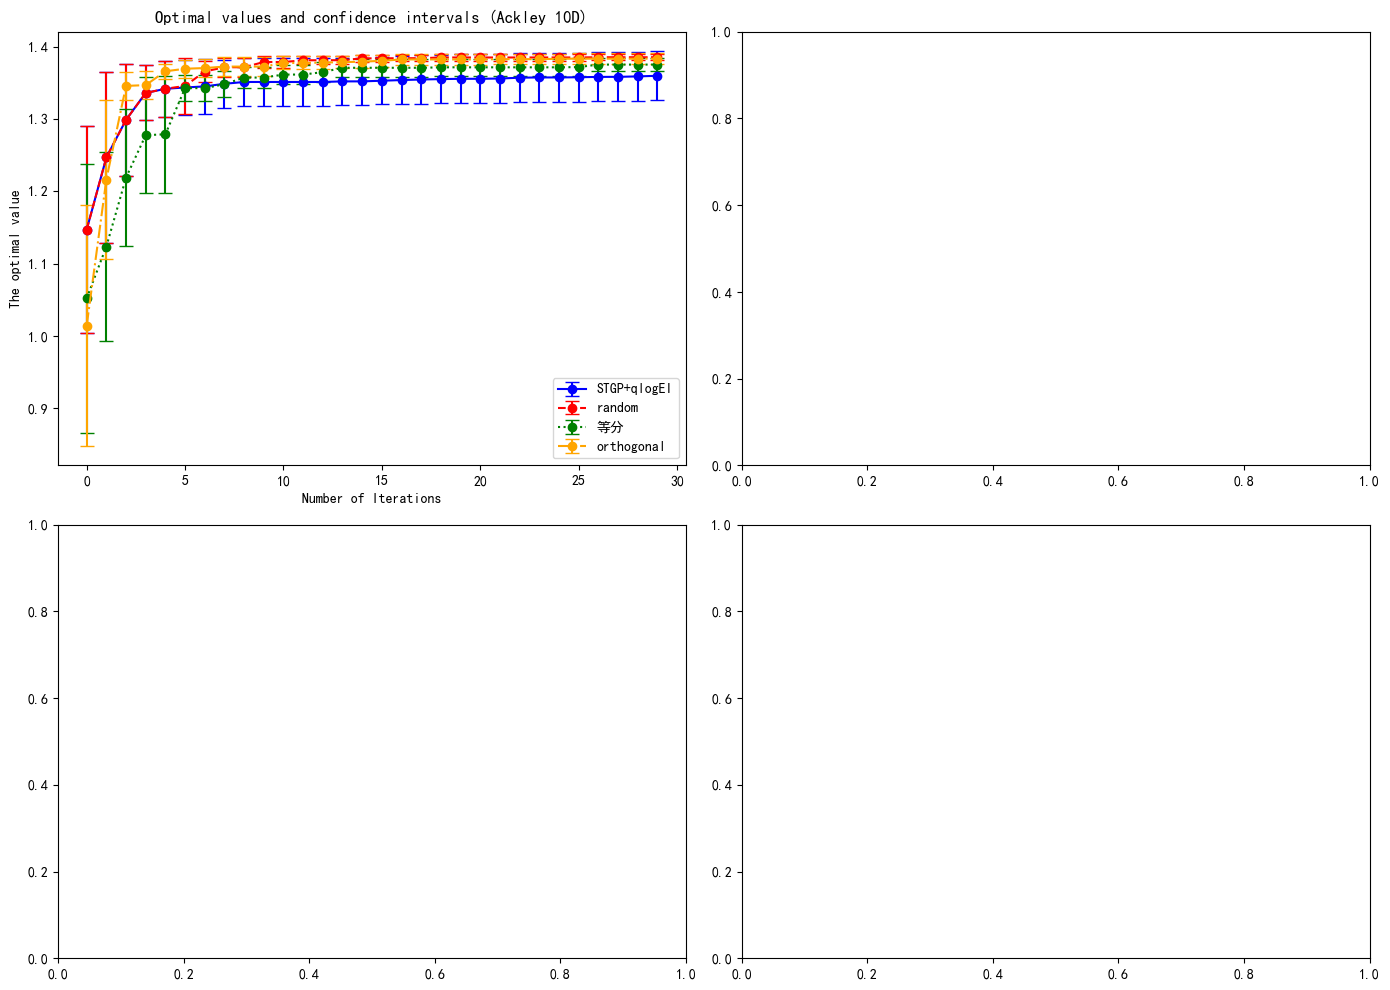

In [55]:
# 定义文件名列表
csv_files = [ '实验数据钼铋铋xg']

# 调用函数并绘图
load_and_plot_individual_results(csv_files)